<a href="https://colab.research.google.com/github/armando030/analisis-py/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [8]:
print(tienda['Precio'].sum())
print(tienda2['Precio'].sum())
print(tienda3['Precio'].sum())
print(tienda4['Precio'].sum())

1150880400.0
1116343500.0
1098019600.0
1038375700.0


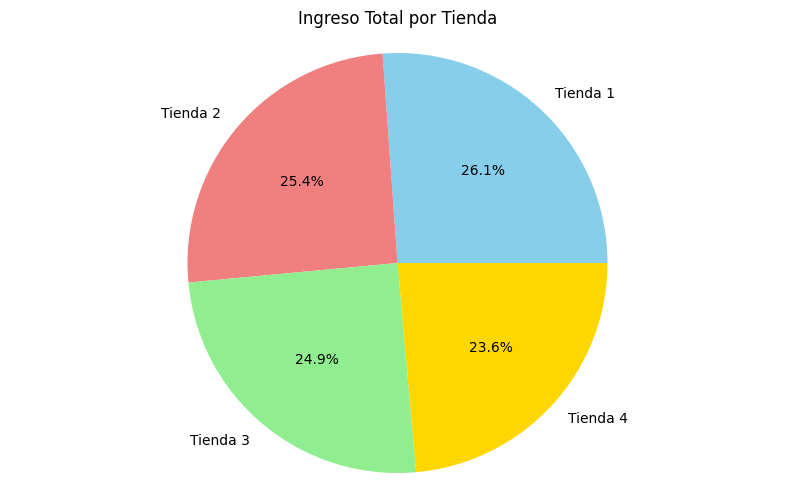

In [69]:
ingreso_total = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3","Tienda 4"],
        "Ingresos": [tienda['Precio'].sum().astype(int),tienda2['Precio'].sum().astype(int),tienda3['Precio'].sum().astype(int),tienda4['Precio'].sum().astype(int)],
    })
ingreso_total['%'] = ingreso_total['Ingresos'] / ingreso_total['Ingresos'].sum()


plt.figure(figsize=(10, 6))
plt.pie(ingreso_total['%'], labels=ingreso_total['Tienda'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Ingreso Total por Tienda')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [70]:
categoria_tienda1 = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False).head(3)
categoria_tienda1.head()

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324


In [71]:
categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False).head(3)
categoria_tienda2.head()

,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313


In [72]:
categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False).head(3)
categoria_tienda3.head()

,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315


In [73]:
categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False).head(3)
categoria_tienda4.head()

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338


<Figure size 2000x2000 with 0 Axes>

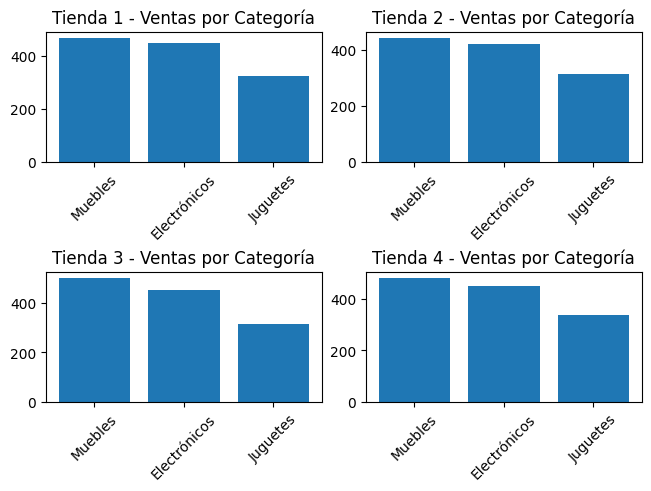

In [81]:
plt.figure(figsize=(20, 20))
fig, axd = plt.subplot_mosaic([['left', 'right'],
                               ['lowleft', 'lowright']], layout='constrained')
axd['left'].set_title('Tienda 1 - Ventas por Categoría')
axd['left'].bar(categoria_tienda1.index, categoria_tienda1.values)
axd['left'].tick_params(axis='x', rotation=45)
axd['right'].set_title('Tienda 2 - Ventas por Categoría')
axd['right'].bar(categoria_tienda2.index, categoria_tienda2.values)
axd['right'].tick_params(axis='x', rotation=45)
axd['lowleft'].set_title('Tienda 3 - Ventas por Categoría')
axd['lowleft'].bar(categoria_tienda3.index, categoria_tienda3.values)
axd['lowleft'].tick_params(axis='x', rotation=45)
axd['lowright'].set_title('Tienda 4 - Ventas por Categoría')
axd['lowright'].bar(categoria_tienda4.index, categoria_tienda4.values)
axd['lowright'].tick_params(axis='x', rotation=45)

plt.show()

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
print(tienda['Calificación'].mean())
print(tienda2['Calificación'].mean())
print(tienda3['Calificación'].mean())
print(tienda4['Calificación'].mean())

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


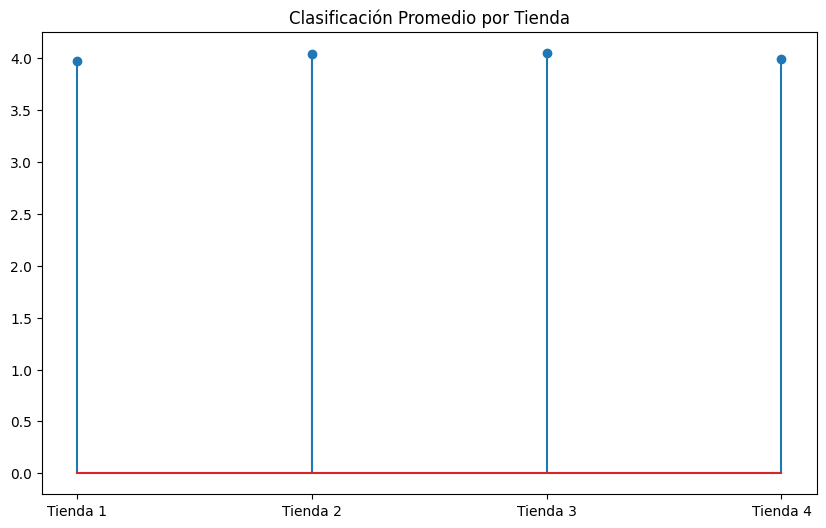

In [79]:
clasificacion_promedio = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Clasificacion": [tienda['Calificación'].mean(),tienda2['Calificación'].mean(),tienda3['Calificación'].mean(),tienda4['Calificación'].mean()]
    }
)

plt.figure(figsize=(10, 6))
plt.stem(clasificacion_promedio['Tienda'], clasificacion_promedio['Clasificacion'])
plt.title('Clasificación Promedio por Tienda')
plt.show()


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [32]:
productos = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos.head()

,Producto
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


In [33]:
productos = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos.head()

,Producto
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58


In [34]:
productos = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos.head()

,Producto
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


In [35]:
productos = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos.head()

,Producto
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [37]:
print(tienda['Costo de envío'].mean())
print(tienda2['Costo de envío'].mean())
print(tienda3['Costo de envío'].mean())
print(tienda4['Costo de envío'].mean())

26018.60958033065
25216.235693090293
24805.680373039424
23459.457167090754


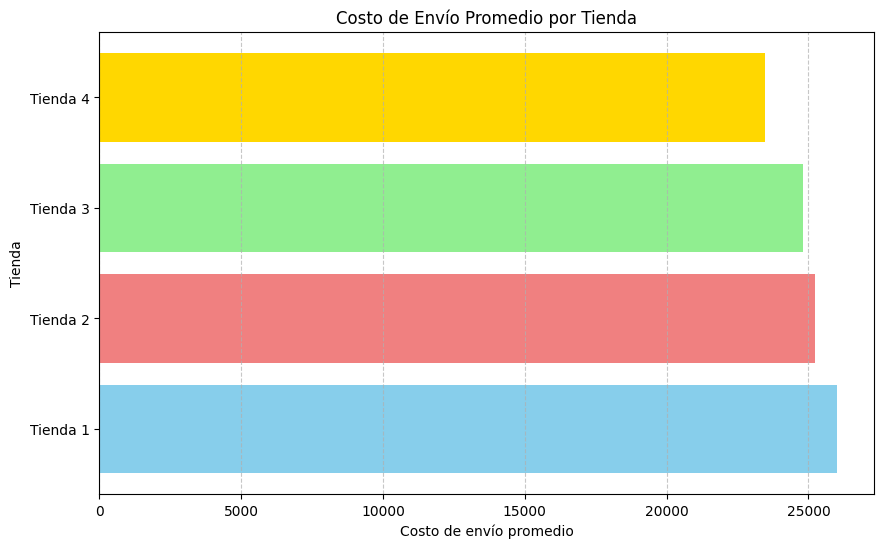

In [80]:
costo_envio = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3","Tienda 4"],
        "Ingresos": [tienda['Costo de envío'].mean(),tienda2['Costo de envío'].mean(),tienda3['Costo de envío'].mean(),tienda4['Costo de envío'].mean()],
    })


plt.figure(figsize=(10, 6))
plt.barh(costo_envio['Tienda'], costo_envio['Ingresos'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Costo de envío promedio')
plt.ylabel('Tienda')
plt.title('Costo de Envío Promedio por Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#**Análisis de desempeño de tiendas**

##**Ingresos totales por tienda**

El análisis de ingresos permite identificar qué tiendas generan mayor rentabilidad.

Los gráficos muestran que existe una diferencia entre el desempeño de las tiendas. La "Tienda 1" presentan los ingresos mas altos, mientras que la "Tienda 4" muestra los menores ingresos.

La "Tienda 4" representa una menor contribución al negocio total y podría estar consumiendo recursos sin generar un retorno proporcional.

##**Categoría de producto más vendida**

El análisis por categorías permitió identificar patrones de consumo de los clientes.

Se observaron las 3 categorías mas solicitadas son similares en todas las tiendas. Estas son "Muebles", "Electrónicos" y "Juguetes".

En el caso de "Muebles" la tienda que tiene mayor cantidad de ventas es la "Tienda 3"

En "Electrónicos", la "Tienda 4" y la "Tienda 3" tienen la misma cantidad vendida en la categoría

Finalmente, la "Tienda 4" es la que destaca en la cantidad vendida de la categoría "Juguetes"

Por lo tanto, la "Tienda 2" es la que peor desempeño muestra ya que es la que menor cantidad de ventas tiene en las 3 principales categorías.

##**Clasificación promedio de clientes**

La satisfacción del cliente es un indicador fundamental para evaluar el posicionamiento y la calidad del servicio.

En ese sentido, la "Tienda 1" es la que tiene la menor calificación seguido de la "Tienda 4". Ambas tiendas no alcanzan a superar los 4 puntos de satisfacción del cliente

#**Recomendación Final**

Tras analizar todos los indicadores, se concluye que la tienda que el Sr. Juan debería vender es la "Tienda 4" porque presenta el peor desempeño global, caracterizado principalmente por:

* Menores ingresos totales

* Baja calificación promedio de clientes

A pesar de tener una mayor cantidad de productos vendidos en las principales categorías, esto no se ve reflejado en los ingresos totales. Evidenciando que la tienda tiene menor rentabilidad.

En conclusión, la decisión del Sr. Juan debe ser vender la "Tienda 4". Ya que, los datos y gráficos demuestran de forma objetiva que es el local con menor desempeño dentro del conjunto analizado.